In [10]:
from scipy.interpolate import Rbf, griddata
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
train = []
with open('build/train.txt') as trainf:
    for row in csv.reader(trainf, delimiter=' '):
        train.append(np.double(row))
test = []
with open('build/test.txt') as testf:
    for row in csv.reader(testf, delimiter=' '):
        test.append(np.double(row))      
        
train = np.array(train)
test = np.array(test)

In [12]:
len(test)

792

In [13]:
Rtr = train[:, :3].reshape(-1, 1, 3)
Rte = test[:, :3].reshape(1, -1, 3)
R = np.linalg.norm(Rtr - Rte, axis=2).T

In [14]:
v = train[:, 3]
p = -20
iv = (R**p).dot(v) / (R**p).dot(np.ones_like(v))

0.00778654595371


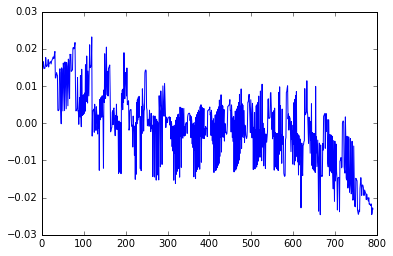

In [15]:
err = (iv - test[:, 3]) / np.abs(test[:, 3])
print(np.mean(np.abs(err)))
plt.plot(err)

In [51]:
# f = Rbf(*train.T, function='linear')
f = Rbf(*train.T, function='thin_plate')
# testv = griddata(train[:, :3], train[:, 3], test[:, :3], method='linear')

Rbf: 0.00257541219777 0.00259588045173
QBX: 0.000438460975963 0.000610387307161


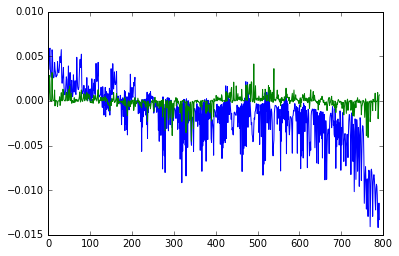

In [52]:
err = (f(*test[:, :3].T) - test[:, 3]) / np.abs(test[:, 3])
plt.plot(err)
print('Rbf:', np.mean(np.abs(err)), np.std(np.abs(err)))
err = (test[:, 4] - test[:, 3]) / np.abs(test[:, 3])
plt.plot(err)
print('QBX:', np.mean(np.abs(err)), np.std(np.abs(err)))

In [30]:
np.std?